In [1]:
!pip install yfinance
!pip install mpl_finance
!pip install stockstats
!pip install get-all-tickers
!pip install Yahoo-ticker-downloader

In [11]:
from google.colab import drive
drive.mount('/content/drive/')
#change this path to the shared folder dir
# root_folder0="/content/drive/My Drive/Trading"
# root_folder0="/content/drive/My Drive/Data_Mining_Final_Project"
root_folder0="/content/drive/My Drive/Data_Mining_Final_Project"
DB_path_basic="Db/DataSet_basic_all_tickers.csv"
DB_path="Db/DataSet_all_tickers_5_years.csv"
%cd $root_folder0
!pwd
!ls
#flat to decide if isntalll or not the libraries
install_libraries=True

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/.shortcut-targets-by-id/1foEAE__IWUeuhhVK8gXy9QWYQ3B19jeq/Data_Mining_Final_Project
/content/drive/.shortcut-targets-by-id/1foEAE__IWUeuhhVK8gXy9QWYQ3B19jeq/Data_Mining_Final_Project
Db		     LSTM_FABIAN_new.ipynb	Papers
loading_data_tes.py  mean_causation_matrix.csv	ProjectFinalPresentaion.pptx
LSTM_attamp_1.ipynb  MVAR_analysis.ipynb	technical_indicators2.ipynb
LSTM_FABIAN.ipynb    no_Data			technical_indicators.ipynb


In [12]:
import yfinance as yf
import pandas_datareader as pdr
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

%matplotlib inline

In [13]:
top_tickers=pdr.get_tops_iex().head(10000)
# #searching some important companies, in this case Apple
# for ind,ticker in enumerate(top_tickers.symbol):
#   if ticker =="AAPL":
#     print(str(ind)+" "+ticker)

In [14]:
top_tickers

,symbol,sector,securityType,bidPrice,bidSize,askPrice,askSize,lastUpdated,lastSalePrice,lastSaleSize,lastSaleTime,volume,marketPercent
0,ANDAR,n/a,right,0,0,0,0,1613509200000,0.000,0,0,0,0.00000
1,DFIN,diversifiedfinancials,commonstock,0,0,0,0,1613509202281,22.515,100,1613509178338,8000,0.03931
2,OCSL,diversifiedfinancials,commonstock,0,0,0,0,1613509200000,6.210,100,1613509059984,16467,0.02738
3,THR,capitalgoods,commonstock,0,0,0,0,1613509317177,17.010,100,1613509171650,6950,0.05927
4,ECC,n/a,closedendfund,0,0,0,0,1613509200000,11.550,300,1613506038110,1740,0.00985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9849,IXC,n/a,etp,0,0,0,0,1613509200337,23.465,100,1613509186581,12080,0.01131
9850,GROW,diversifiedfinancials,commonstock,0,0,0,0,1613509200000,7.165,200,1613509187909,8545,0.01618
9851,JMIA,retailing,adr,0,0,0,0,1613512735919,61.880,100,1613509194534,128528,0.02752
9852,APO,diversifiedfinancials,commonstock,0,0,0,0,1613509201982,51.530,50,1613509196571,21175,0.02205


In [15]:
import numpy as np
#adding manually the first 100 important tickers in the world
# tickers=["BTC-USD"]
# tickers=["TSLA"]
tickers=["ATVI","ADBE","AMD","ALXN","ALGN","GOOGL","GOOG","AMZN","AEP","AMGN","ADI","ANSS","AAPL","AMAT","ASML","TEAM","ADSK","ADP","BIDU","BIIB","BKNG","AVGO","CDNS","CDW","CERN","CHTR","CHKP","CTAS","CSCO","CTSH","CMCSA","CPRT","COST","CSX","DXCM","DOCU","DLTR","EBAY","EA","EXC","FB","FAST","FISV","FOXA","FOX","GILD","IDXX","ILMN","INCY","INTC","INTU","ISRG","JD","KDP","KLAC","KHC","LRCX","LULU","MAR","MRVL","MTCH","MXIM","MELI","MCHP","MU","MSFT","MRNA","MDLZ","MNST","NTES","NFLX","NVDA","NXPI","ORLY","OKTA","PCAR","PAYX","PYPL","PTON","PEP","PDD","QCOM","REGN","ROST","SGEN","SIRI","SWKS","SPLK","SBUX","SNPS","TMUS","TSLA","TXN","TCOM","VRSN","VRSK","VRTX","WBA","WDAY","XEL","XLNX","ZM"]
# new_tickers=np.unique(tickers.index.values)

In [16]:
len(tickers)

102

In [17]:
from stockstats import StockDataFrame
from datetime import date
# stock = StockDataFrame.retype(df_aapl[["Open", "Close", "High", "Low", "Volume"]])
num_years=5
process_DS=False
if process_DS:
  DB_path_basic
  df1= pd.read_csv(DB_path_basic, sep='\t',header=[0,1], index_col=0)
  df1.index = pd.to_datetime(df1.index)
  value_to_check = pd.Timestamp(date.today().year-num_years-1,1,1)
  df1=df1[df1.index>= value_to_check]
  #deleting rows with null values
  # df1=df1.dropna()
  #buffer to store and process the tickers data
  # df1.index.name
  
  buff_Tickers=[]
  Tickers_DF=pd.DataFrame()
  tickers_names=df1.columns.get_level_values('Symbols').unique()#[:2]
  new_tickers_name=[]
  # print(tickers_names)
  for ticker_name in tickers_names:
    # print(df1[ticker_name])
    # bn=df1[ticker_name].columns
    # print(bn)
    temp_df=df1[ticker_name].dropna()
    if len(temp_df)>=(num_years*316*0.9):
      temp_pd=Feature_Extraction(df1[ticker_name])
      buff_Tickers.append(temp_pd)
      new_tickers_name.append(ticker_name)
  #concat all tickers dataframes already processed
  # pdtin=pd.MultiIndex.from_arrays([new_tickers_name],names=('Symbols'))
  pdtin=pd.Index(new_tickers_name,dtype='object',name='Symbols')
  # pdtin=pdtin.set_names(['Symbols'])
  Tickers_DF=pd.concat(buff_Tickers,keys=pdtin,axis=1)
  #pay attention to this because can delete important rows, if there is an error is here.
  Tickers_DF=Tickers_DF.dropna()
  Tickers_DF.to_csv(DB_path,sep='\t',index=True)
else:
  Tickers_DF= pd.read_csv(DB_path, sep='\t',header=[0,1], index_col=0)
  print("DataSet Loaded")

DataSet Loaded


In [18]:
Tickers_DF

Symbols           ATVI                          ...      XLNX                      
Atributes    adj close       close        high  ...    change         vr   vr_6_sma
Date                                            ...                                
2015-01-20   19.347851   20.219999   20.340000  ... -0.388161  31.604860  32.207252
2015-01-21   19.233032   20.100000   20.180000  ...  1.095950  50.626788  32.464639
2015-01-22   19.701893   20.590000   20.600000  ... -6.143096  29.698681  31.890913
2015-01-23   19.759308   20.650000   20.830000  ...  0.821354  38.375717  34.377971
2015-01-26   19.941111   20.840000   20.870001  ... -0.738282  35.403690  37.017611
...                ...         ...         ...  ...       ...        ...        ...
2021-02-09  102.730003  102.730003  103.769997  ... -0.410087  86.518067  82.609826
2021-02-10  102.760002  102.760002  103.440002  ...  1.632934  85.992196  83.666935
2021-02-11  103.239998  103.239998  104.220001  ...  0.733498  83.676748  85.228565
2021-02-12  103.809998  103.809998  103.889999  ...  1.074898  94.513959  87.580061
2021-02-16  102.959999  102.959999  104.529999  ... -2.174956  85.547985  87.228496

[1530 rows x 7371 columns]

In [19]:
ticker_name="TSLA"
Tickers_DF[ticker_name].head()

Atributes,adj close,close,high,low,open,volume,volume_delta,open_-2_r,middle,cr,cr-ma1,cr-ma2,cr-ma3,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,open_2_sma,macd,macds,macdh,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,close_10.0_le,close_10.0_le_5_c,cr-ma1_20_c,cr-ma2_xu_cr-ma1_20_c,close_10.0_ge,close_10.0_ge_5_fc,close_-1_s,close_-1_d,rs_6,rsi_6,rs_12,...,wr_10,wr_6,middle_14_sma,cci,middle_20_sma,cci_20,tr,atr,close_10_sma,close_50_sma,dma,high_delta,um,low_delta,dm,pdm,pdm_14_ema,pdm_14,atr_14,pdi_14,pdi,mdm,mdm_14_ema,mdm_14,mdi_14,mdi,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,close_3_trix,trix_9_sma,tema,close_2_tema,change,vr,vr_6_sma
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-20,38.386002,38.386002,38.824001,37.408001,38.773998,22516000.0,4500000.0,-0.318784,38.206001,37.064820,36.645786,28.407671,7.978721,23.270673,23.448362,23.448362,24.178665,24.178665,21.987755,21.987755,38.456999,-0.477513,-0.298726,-0.178787,40.748833,1.874585,40.748833,44.498004,36.999663,False,0.0,11.0,False,True,5.0,38.613998,-0.227997,0.168119,14.392255,0.152916,...,76.729327,69.349806,40.723944,-102.386062,40.723944,-102.386062,1.416000,1.578836,40.3106,40.748833,-0.438233,-0.073997,0.000000,-0.521999,0.521999,0.000000,0.077007,0.077007,1.578836,4.877424,4.877424,0.521999,0.665471,0.665471,42.149439,42.149439,79.256860,79.256860,78.771807,78.771807,81.527816,81.527816,-0.460184,-1.132136,-0.348015,38.171331,38.407297,-0.590451,32.842985,34.069765
2015-01-21,39.313999,39.313999,39.736000,37.902000,37.910000,20765000.0,-1751000.0,-0.603040,38.984000,47.809157,34.251999,30.478685,19.354874,40.173609,29.023444,29.023444,25.793592,25.793592,35.483149,35.483149,38.341999,-0.450390,-0.330823,-0.119567,40.638461,1.838368,40.638461,44.315197,36.961726,False,0.0,12.0,False,True,5.0,38.386002,0.927998,0.590842,37.140194,0.403885,...,61.148444,48.827963,40.590103,-64.598218,40.590103,-64.598218,1.834000,1.609777,40.0164,40.638461,-0.622062,0.911999,0.911999,0.493999,0.000000,0.911999,0.208858,0.208858,1.609777,12.974349,12.974349,0.000000,0.560388,0.560388,34.811510,34.811510,45.697955,45.697955,69.152464,69.152464,77.928514,77.928514,-0.471132,-0.571544,-0.360434,38.856181,39.285086,2.417542,42.353033,36.469035
2015-01-22,40.324001,40.324001,40.647999,39.040001,39.400002,20584500.0,-180500.0,1.614492,40.004000,60.423490,34.485642,30.161694,26.504235,66.533274,41.526721,41.526721,31.037968,31.037968,62.504227,62.504227,38.655001,-0.365702,-0.338120,-0.027582,40.616000,1.768245,40.616000,44.152490,37.079510,False,0.0,13.0,False,True,5.0,39.313999,1.010002,1.142935,53.335033,0.701864,...,42.291627,8.881513,40.548238,-22.949097,40.548238,-22.949097,1.607998,1.609572,39.8298,40.616000,-0.786200,0.911999,0.911999,1.138000,0.000000,0.911999,0.317226,0.317226,1.609572,19.708739,19.708739,0.000000,0.474021,0.474021,29.450114,29.450114,19.816116,19.816116,54.876502,54.876502,71.258186,71.258186,-0.456396,0.147215,-0.378369,39.906256,40.326377,2.569065,51.780415,37.107915
2015-01-23,40.257999,40.257999,40.700001,39.666000,40.057999,17193000.0,-3391500.0,5.666048,40.208000,64.058325,36.283938,30.808548,28.474537,72.047764,51.700402,51.700402,37.925446,37.925446,79.250314,79.250314,39.729000,-0.301086,-0.330443,0.029357,40.592133,1.706429,40.592133,44.004991,37.179276,False,0.0,14.0,False,True,5.0,40.324001,-0.066002,1.095506,52.278836,0.687264,...,34.787821,13.426530,40.297286,-4.387034,40.525556,-14.144029,1.034000,1.545898,39.6432,40.592133,-0.948933,0.052002,0.052002,0.625999,0.000000,0.052002,0.277182,0.277182,1.545898,17.930184,17.930184,0.000000,0.402452,0.402452,26.033566,26.033566,18.431963,18.431963,44.369219,44.369219,63.505858,63.505858,-0.428261,0.486147,-0.395260,40.310628,40.313691,-0.163679,48.000773,39.835961
2015-01-26,41.310001,41.310001,41.723999,40.209999,40.366001,16172500.0,-1020500.0,2.451776,41.081333,75.263597,37.264815,31.480090,28.407671,91.236288,64.879031,64.879031,46.909974,46.909974

In [20]:
Tickers_DF[ticker_name,"close"]

Date
2015-01-20     38.386002
2015-01-21     39.313999
2015-01-22     40.324001
2015-01-23     40.257999
2015-01-26     41.310001
                 ...    
2021-02-09    849.460022
2021-02-10    804.820007
2021-02-11    811.659973
2021-02-12    816.119995
2021-02-16    796.219971
Name: (TSLA, close), Length: 1530, dtype: float64

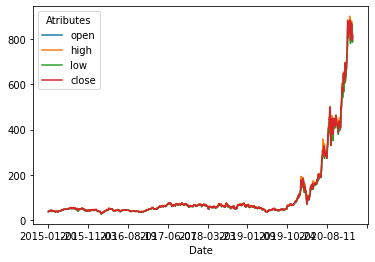

In [21]:
Tickers_DF[ticker_name][map(str.lower,["Open", "High", "Low", "Close"])].plot()
plt.show()

# Extended Companies DB

In [22]:
ticker_name="TSLA"
features = ["open", "high", "low", "close"]
ext_db = Tickers_DF[ticker_name][features]

ext_db.head()

Atributes,open,high,low,close
Date,,,,
2015-01-20,38.773998,38.824001,37.408001,38.386002
2015-01-21,37.910000,39.736000,37.902000,39.313999
2015-01-22,39.400002,40.647999,39.040001,40.324001
2015-01-23,40.057999,40.700001,39.666000,40.257999
2015-01-26,40.366001,41.723999,40.209999,41.310001


In [23]:
coorps = ["ATVI","ADBE","AMD","ALXN","ALGN","GOOGL","GOOG"]
for coorp in coorps:
  for feat in features:
    ext_db[coorp+'_'+feat] = Tickers_DF[coorp][feat]

df_close = ext_db.pop("close")
ext_db["close"] = df_close
df = ext_db
df

Atributes,open,high,low,ATVI_open,ATVI_high,ATVI_low,ATVI_close,ADBE_open,ADBE_high,ADBE_low,ADBE_close,AMD_open,AMD_high,AMD_low,AMD_close,ALXN_open,ALXN_high,ALXN_low,ALXN_close,ALGN_open,ALGN_high,ALGN_low,ALGN_close,GOOGL_open,GOOGL_high,GOOGL_low,GOOGL_close,GOOG_open,GOOG_high,GOOG_low,GOOG_close,close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-20,38.773998,38.824001,37.408001,20.340000,20.340000,19.799999,20.219999,71.790001,71.989998,70.580002,71.489998,2.390000,2.430000,2.190000,2.240000,181.750000,183.250000,177.949997,183.059998,57.090000,57.220001,55.450001,56.240002,512.770020,515.609985,509.369995,509.940002,509.600891,511.096771,504.630524,505.512115,38.386002
2015-01-21,37.910000,39.736000,37.902000,20.110001,20.180000,19.930000,20.100000,71.160004,71.889999,70.370003,71.540001,2.180000,2.450000,2.140000,2.450000,181.960007,183.179993,178.470001,179.259995,56.240002,57.049999,55.669998,55.900002,510.839996,521.849976,509.589996,520.390015,505.861145,517.858215,504.814026,516.621643,39.313999
2015-01-22,39.400002,40.647999,39.040001,20.160000,20.600000,20.049999,20.590000,71.900002,73.650002,70.900002,73.480003,2.420000,2.500000,2.370000,2.470000,180.580002,181.919998,174.570007,180.320007,56.130001,58.110001,55.959999,58.009998,523.000000,538.840027,521.909973,537.299988,520.052185,534.861511,518.277100,532.926819,40.324001
2015-01-23,40.057999,40.700001,39.666000,20.590000,20.830000,20.520000,20.650000,73.440002,74.400002,73.059998,74.059998,2.480000,2.500000,2.430000,2.450000,180.529999,183.369995,180.259995,183.320007,58.029999,58.160000,57.009998,57.459999,538.030029,545.409973,535.750000,541.950012,534.123535,540.685547,531.540649,538.471619,40.257999
2015-01-26,40.366001,41.723999,40.209999,20.650000,20.870001,20.520000,20.840000,72.610001,73.150002,71.680000,72.739998,2.440000,2.640000,2.440000,2.610000,182.960007,183.860001,182.009995,182.759995,57.470001,58.340000,56.660000,58.200001,541.500000,541.500000,532.070007,536.719971,537.055542,537.524231,528.219788,533.744629,41.310001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-09,855.119995,859.799988,841.750000,101.949997,103.769997,101.059998,102.730003,495.000000,497.950012,492.010010,496.049988,91.389999,93.300003,90.550003,90.910004,154.509995,155.800003,154.440002,155.270004,601.390015,618.840027,601.390015,615.000000,2074.800049,2098.510010,2070.000000,2075.389893,2078.540039,2105.129883,2078.540039,2083.510010,849.460022
2021-02-10,843.640015,844.820007,800.020020,103.040001,103.440002,101.250000,102.760002,499.170013,499.989990,490.269989,492.670013,91.500000,93.269997,90.459999,92.349998,156.080002,156.630005,154.119995,154.580002,618.070007,618.070007,598.210022,605.780029,2083.139893,2098.879883,2052.239990,2086.479980,2094.209961,2108.370117,2063.090088,2095.379883,804.820007
2021-02-11,812.440002,829.880005,801.729980,103.500000,104.220001,102.550003,103.239998,494.529999,497.000000,491.079987,496.619995,92.900002,93.650002,91.330002,92.660004,154.990005,155.429993,153.589996,154.589996,611.770020,611.770020,591.150024,599.000000,2091.000000,2094.000000,2068.860107,2088.750000,2099.510010,2102.030029,2077.320068,2095.889893,811.659973


## Normalization

In [72]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

1377 153


In [76]:
from sklearn.preprocessing import RobustScaler

f_columns = list(df.columns)[:-1]

f_transformer = MinMaxScaler()
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(
  train[f_columns].to_numpy()
)

test.loc[:, f_columns] = f_transformer.transform(
  test[f_columns].to_numpy()
)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib

In [77]:
close_transformer = MinMaxScaler()
close_transformer = close_transformer.fit(train[['close']])
train.loc[:,'close'] = close_transformer.transform(train[['close']])
test.loc[:,'close'] = close_transformer.transform(test[['close']])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


## Preprocessing

In [79]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [81]:
time_steps = 100

X_train, y_train = create_dataset(train, train.close, time_steps)
X_test, y_test = create_dataset(test, test.close, time_steps)
print(X_train.shape, y_train.shape)

(1367, 10, 32) (1367,)


## Model

In [87]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

## Training

In [98]:
history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=64,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/1000
20/20 [==============================] - 0s 8ms/step - loss: 4.1701e-04 - val_loss: 0.0108
Epoch 2/1000
20/20 [==============================] - 0s 7ms/step - loss: 3.1345e-04 - val_loss: 0.0170
Epoch 3/1000
20/20 [==============================] - 0s 6ms/step - loss: 5.0208e-04 - val_loss: 0.0283
Epoch 4/1000
20/20 [==============================] - 0s 6ms/step - loss: 3.6736e-04 - val_loss: 0.0197
Epoch 5/1000
20/20 [==============================] - 0s 13ms/step - loss: 5.9362e-04 - val_loss: 0.0136
Epoch 6/1000
20/20 [==============================] - 0s 6ms/step - loss: 2.8454e-04 - val_loss: 0.0188
Epoch 7/1000
20/20 [==============================] - 0s 7ms/step - loss: 4.2258e-04 - val_loss: 0.0268
Epoch 8/1000
20/20 [==============================] - 0s 6ms/step - loss: 2.4852e-04 - val_loss: 0.0186
Epoch 9/1000
20/20 [==============================] - 0s 6ms/step - loss: 3.4917e-04 - val_loss: 0.0129
Epoch 10/1000
20/20 [==============================] - 0s 6ms/s

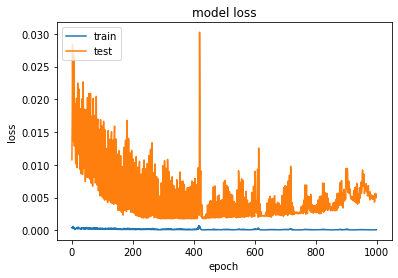

In [99]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Prediction

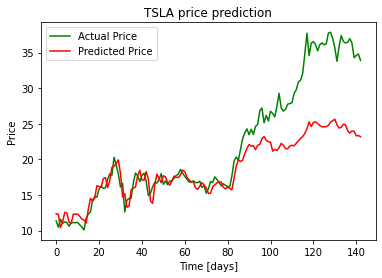

In [100]:
y_hat = model.predict(X_test)

y_test_inverse = close_transformer.inverse_transform(y_test.reshape(-1,1))
y_hat_inverse = close_transformer.inverse_transform(y_hat.reshape(-1,1))
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title(ticker_name+' price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

# Filtered Companies DB


In [101]:
causation_matrix = pd.read_csv("mean_causation_matrix.csv",index_col=0)
causation_matrix = causation_matrix.T
causation_matrix.head(100)

,AAPL_y,ADBE_y,ADI_y,ADP_y,ADSK_y,AEP_y,ALGN_y,ALXN_y,AMAT_y,AMD_y,AMGN_y,AMZN_y,ANSS_y,ASML_y,ATVI_y,AVGO_y,BIDU_y,BIIB_y,BKNG_y,CDNS_y,CDW_y,CERN_y,CHKP_y,CHTR_y,CMCSA_y,COST_y,CPRT_y,CSCO_y,CSX_y,CTAS_y,CTSH_y,DLTR_y,DXCM_y,EA_y,EBAY_y,EXC_y,FAST_y,FB_y,FISV_y,GILD_y,...,LRCX_y,LULU_y,MAR_y,MCHP_y,MDLZ_y,MELI_y,MNST_y,MRVL_y,MSFT_y,MTCH_y,MU_y,MXIM_y,NFLX_y,NTES_y,NVDA_y,NXPI_y,ORLY_y,PAYX_y,PCAR_y,PEP_y,QCOM_y,REGN_y,ROST_y,SBUX_y,SGEN_y,SIRI_y,SNPS_y,SPLK_y,SWKS_y,TCOM_y,TMUS_y,TSLA_y,TXN_y,VRSK_y,VRSN_y,VRTX_y,WBA_y,WDAY_y,XEL_y,XLNX_y
ATVI_x,0.219667,0.125300,0.123833,0.086700,0.101600,0.137633,0.050900,0.161333,0.099033,0.077433,0.076767,0.349900,0.060900,0.095767,1.000000,0.172433,0.080333,0.136333,0.101800,0.153433,0.107233,0.065900,0.149367,0.095533,0.133300,0.134700,0.022600,0.049467,0.244667,0.026967,0.068700,0.069800,0.215067,0.083267,0.116867,0.192400,0.071567,0.242367,0.089067,0.008333,...,0.196767,0.034433,0.379933,0.093533,0.024100,0.251067,0.019600,0.127233,0.058900,0.205567,0.179700,0.099633,0.199267,0.131733,0.159367,0.240800,0.087133,0.163433,0.144100,0.024233,0.130967,0.096567,0.169033,0.016967,0.134033,0.228167,0.003900,0.085700,0.218333,0.045400,0.039567,0.116533,0.103667,0.047333,0.046500,0.210367,0.121833,0.043300,0.178333,0.094733
ADBE_x,0.029333,1.000000,0.088033,0.093300,0.035400,0.017600,0.131267,0.069800,0.243500,0.018233,0.136600,0.161467,0.063367,0.087667,0.125067,0.026033,0.094833,0.024433,0.056900,0.172067,0.198333,0.095100,0.185733,0.059100,0.121967,0.060867,0.136900,0.009033,0.129900,0.042233,0.078333,0.147800,0.172000,0.126000,0.183700,0.064267,0.011233,0.074300,0.128267,0.036600,...,0.131500,0.025000,0.148133,0.014233,0.025167,0.040000,0.151800,0.072767,0.150767,0.133100,0.002467,0.093467,0.144867,0.260867,0.092367,0.024900,0.008467,0.049067,0.067733,0.034333,0.046033,0.022833,0.056367,0.073367,0.006767,0.069033,0.101933,0.015067,0.000633,0.026733,0.035367,0.012900,0.063233,0.245033,0.058033,0.009533,0.034400,0.100467,0.038433,0.021433
AMD_x,0.092867,0.078367,0.159167,0.174967,0.020600,0.054233,0.053267,0.049800,0.066867,1.000000,0.033267,0.216700,0.033633,0.051400,0.029467,0.198000,0.016100,0.011467,0.118133,0.157333,0.168167,0.239800,0.002700,0.029700,0.066433,0.105567,0.080167,0.016500,0.035500,0.175400,0.067767,0.230400,0.014700,0.000467,0.053967,0.075933,0.052733,0.039433,0.301600,0.084933,...,0.048367,0.300233,0.016333,0.011167,0.017567,0.143967,0.200100,0.000233,0.087867,0.211367,0.000433,0.023833,0.119667,0.011200,0.010233,0.273833,0.155667,0.095067,0.050167,0.070300,0.012733,0.005100,0.070967,0.141767,0.098200,0.054533,0.154933,0.052133,0.034133,0.060467,0.034567,0.105933,0.003600,0.093233,0.080167,0.065567,0.037400,0.150133,0.141767,0.081100
ALXN_x,0.191133,0.060633,0.024200,0.095733,0.070133,0.047133,0.024533,1.000000,0.180867,0.409033,0.273367,0.176400,0.042567,0.197200,0.149700,0.115533,0.091300,0.221700,0.238000,0.095533,0.178267,0.043133,0.059667,0.108433,0.010767,0.006700,0.125833,0.072133,0.093467,0.120500,0.115667,0.086933,0.016667,0.087867,0.054067,0.065700,0.012067,0.071800,0.089833,0.039133,...,0.069033,0.245033,0.030800,0.197000,0.010933,0.056767,0.092100,0.141867,0.008367,0.057933,0.224667,0.226300,0.050900,0.218867,0.157700,0.175800,0.060500,0.184567,0.116867,0.008100,0.046833,0.050467,0.158600,0.081400,0.129733,0.128300,0.035700,0.086367,0.027867,0.085767,0.006533,0.170200,0.175100,0.097967,0.031333,0.096333,0.096233,0.231433,0.046600,0.006633
ALGN_x,0.158467,0.202667,0.023733,0.059967,0.030833,0.066033,1.000000,0.003467,0.054633,0.006933,0.056133,0.094467,0.007900,0.080500,0.028167,0.075567,0.016467,0.064567,0.152100,0.150100,0.131167,0.015133,0.128533,0.000633,0.050500,0.086433,0.198100,0.013500,0.281367,0.096900,0.009200,0.098233,0.000900,0.149433,0.004367,0.046433,0.014333,0.255967,0.143533,0.066467,...,0.067967,0.072133,0.042633,0.077033,0.204400,0.013700,0.109067,0.079633,0.027133,0.051567,0.006767,0.006233,0.044067,0.232267,0.015900,0.211533,0.182467,0.080

In [102]:
# comp_dict = causation_matrix['AAPL_y'].to_dict()
comp_dict = causation_matrix[ticker_name+'_y'].to_dict()

print(comp_dict)

{'ATVI_x': 0.11653333333333332, 'ADBE_x': 0.0129, 'AMD_x': 0.10593333333333332, 'ALXN_x': 0.17020000000000002, 'ALGN_x': 0.1556, 'GOOGL_x': 0.0882, 'GOOG_x': 0.08896666666666665, 'AMZN_x': 0.0353, 'AEP_x': 0.060966666666666676, 'AMGN_x': 0.0703, 'ADI_x': 0.049466666666666666, 'ANSS_x': 0.09243333333333333, 'AAPL_x': 0.2342666666666667, 'AMAT_x': 0.012433333333333331, 'ASML_x': 0.10800000000000001, 'ADSK_x': 0.0732, 'ADP_x': 0.2366666666666667, 'BIDU_x': 0.3338666666666667, 'BIIB_x': 0.027533333333333337, 'BKNG_x': 0.11413333333333335, 'AVGO_x': 0.03563333333333333, 'CDNS_x': 0.08136666666666666, 'CDW_x': 0.0863, 'CERN_x': 0.0278, 'CHTR_x': 0.12283333333333335, 'CHKP_x': 0.0541, 'CTAS_x': 0.009233333333333331, 'CSCO_x': 0.0703, 'CTSH_x': 0.04693333333333333, 'CMCSA_x': 0.08606666666666668, 'CPRT_x': 0.0538, 'COST_x': 0.016233333333333332, 'CSX_x': 0.24716666666666665, 'DXCM_x': 0.0468, 'DLTR_x': 0.04936666666666667, 'EBAY_x': 0.2391333333333333, 'EA_x': 0.18946666666666667, 'EXC_x': 0.2

In [103]:
for comp_key in sorted(comp_dict, key=comp_dict.get, reverse=True):
    print(comp_key, comp_dict[comp_key])

related_company = [comp_key for comp_key in sorted(comp_dict, key=comp_dict.get, reverse=True)][1:11]
print(related_company)  

TSLA_x 1.0
KDP_x 0.3643333333333333
BIDU_x 0.3338666666666667
CSX_x 0.24716666666666665
EBAY_x 0.2391333333333333
ADP_x 0.2366666666666667
AAPL_x 0.2342666666666667
EXC_x 0.2291333333333333
PAYX_x 0.2048333333333333
WDAY_x 0.19353333333333333
EA_x 0.18946666666666667
ALXN_x 0.17020000000000002
IDXX_x 0.16176666666666667
INTU_x 0.16176666666666667
ALGN_x 0.1556
TMUS_x 0.1525
ORLY_x 0.14403333333333332
GILD_x 0.14046666666666666
INCY_x 0.13816666666666666
MAR_x 0.13549999999999998
SNPS_x 0.13449999999999998
FB_x 0.13433333333333333
NVDA_x 0.12913333333333335
CHTR_x 0.12283333333333335
MDLZ_x 0.12153333333333335
ATVI_x 0.11653333333333332
BKNG_x 0.11413333333333335
LULU_x 0.11176666666666668
INTC_x 0.10833333333333334
ASML_x 0.10800000000000001
AMD_x 0.10593333333333332
MU_x 0.10533333333333332
MXIM_x 0.09716666666666668
XEL_x 0.09563333333333336
SGEN_x 0.093
ANSS_x 0.09243333333333333
GOOG_x 0.08896666666666665
GOOGL_x 0.0882
PCAR_x 0.08700000000000001
CDW_x 0.0863
CMCSA_x 0.086066666666

In [104]:
ticker_name="TSLA"
features = ["open", "high", "low", "close"]
ext_db = Tickers_DF[ticker_name][features]

ext_db

Atributes,open,high,low,close
Date,,,,
2015-01-20,38.773998,38.824001,37.408001,38.386002
2015-01-21,37.910000,39.736000,37.902000,39.313999
2015-01-22,39.400002,40.647999,39.040001,40.324001
2015-01-23,40.057999,40.700001,39.666000,40.257999
2015-01-26,40.366001,41.723999,40.209999,41.310001
...,...,...,...,...
2021-02-09,855.119995,859.799988,841.750000,849.460022
2021-02-10,843.640015,844.820007,800.020020,804.820007
2021-02-11,812.440002,829.880005,801.729980,811.659973


In [105]:
coorps = [coorp[:-2] for coorp in related_company]
for coorp in coorps:
  for feat in features:
    ext_db[coorp+'_'+feat] = Tickers_DF[coorp][feat]

df_close = ext_db.pop("close")
ext_db["close"] = df_close
df = ext_db
df

Atributes,open,high,low,KDP_open,KDP_high,KDP_low,KDP_close,BIDU_open,BIDU_high,BIDU_low,BIDU_close,CSX_open,CSX_high,CSX_low,CSX_close,EBAY_open,EBAY_high,EBAY_low,EBAY_close,ADP_open,ADP_high,ADP_low,ADP_close,AAPL_open,AAPL_high,AAPL_low,AAPL_close,EXC_open,EXC_high,EXC_low,EXC_close,PAYX_open,PAYX_high,PAYX_low,PAYX_close,WDAY_open,WDAY_high,WDAY_low,WDAY_close,EA_open,EA_high,EA_low,EA_close,close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-20,38.773998,38.824001,37.408001,77.120003,77.830002,76.269997,77.800003,222.020004,223.850006,217.009995,220.360001,34.840000,35.139999,34.430000,34.540001,22.685184,22.756735,22.272728,22.592592,84.830002,85.220001,83.790001,84.970001,26.959999,27.242500,26.625000,27.180000,37.500000,37.580002,36.790001,37.250000,47.790001,47.799999,47.060001,47.540001,78.720001,78.980003,77.000000,78.320000,48.240002,48.590000,47.509998,47.810001,38.386002
2015-01-21,37.910000,39.736000,37.902000,77.830002,78.800003,77.320000,78.739998,220.820007,228.940002,220.059998,228.279999,34.509998,35.000000,34.369999,34.700001,22.478956,22.718855,22.369528,22.466330,84.559998,85.150002,84.099998,84.559998,27.237499,27.764999,27.067499,27.387501,37.169998,38.020000,36.889999,37.990002,47.480000,47.610001,47.040001,47.349998,78.269997,81.400002,77.900002,80.389999,47.709999,48.490002,47.290001,48.070000,39.313999
2015-01-22,39.400002,40.647999,39.040001,79.139999,79.410004,78.260002,79.339996,230.000000,230.509995,224.899994,229.880005,35.009998,35.450001,34.830002,35.250000,23.223906,24.086700,23.143940,24.053030,85.000000,86.790001,84.000000,86.610001,27.565001,28.117500,27.430000,28.100000,38.220001,38.250000,37.000000,37.250000,47.500000,48.040001,47.020000,47.959999,80.699997,81.870003,79.629997,81.400002,48.340000,49.400002,47.919998,49.360001,40.324001
2015-01-23,40.057999,40.700001,39.666000,79.449997,79.489998,78.419998,78.510002,229.199997,234.669998,228.600006,233.330002,35.020000,35.070000,34.419998,34.470001,23.985691,24.107744,23.703703,23.888889,86.650002,87.180000,86.389999,86.849998,28.075001,28.437500,27.882500,28.245001,37.369999,37.650002,37.320000,37.369999,47.970001,48.480000,47.790001,48.380001,81.650002,84.330002,81.320000,83.199997,49.430000,50.410000,49.330002,49.790001,40.257999
2015-01-26,40.366001,41.723999,40.209999,78.510002,79.169998,78.080002,79.120003,234.490005,234.500000,228.110001,229.460007,34.450001,35.000000,34.380001,34.959999,23.724747,23.960438,23.497475,23.594276,86.250000,86.889999,85.489998,86.570000,28.434999,28.590000,28.200001,28.275000,37.259998,37.419998,36.950001,37.340000,48.310001,48.400002,47.709999,48.180000,82.919998,83.809998,82.120003,82.779999,49.299999,49.790001,48.790001,49.480000,41.310001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-09,855.119995,859.799988,841.750000,32.029999,32.459999,31.830000,32.400002,279.600006,304.239990,279.040009,295.040009,86.809998,88.720001,86.010002,88.470001,63.869999,63.910000,62.119999,62.230000,167.869995,168.419998,166.429993,167.380005,136.619995,137.880005,135.850006,136.009995,43.930000,44.000000,43.310001,43.570000,91.660004,91.680000,90.779999,90.889999,270.220001,275.869995,267.429993,275.369995,142.570007,148.229996,142.429993,146.110001,849.460022
2021-02-10,843.640015,844.820007,800.020020,32.599998,32.630001,31.879999,32.029999,309.920013,322.890015,296.600006,304.049988,89.160004,89.389999,87.620003,88.180000,62.549999,63.220001,61.759998,62.320000,168.399994,168.660004,166.240005,166.940002,136.479996,136.990005,134.399994,135.389999,43.830002,43.880001,43.049999,43.320000,91.510002,91.510002,90.400002,90.449997,276.000000,277.410004,272.200012,274.089996,146.949997,147.410004,144.119995,144.610001,804.820007
2021-02-11,812.440002,829.880005,801.729980,31.980000,32.259998,31.750000,31.910000,308.970001,312.200012,301.109985,309.589996,88.940002,89

## Normalization

In [106]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

1377 153


In [107]:
from sklearn.preprocessing import RobustScaler

f_columns = list(df.columns)[:-1]

f_transformer = MinMaxScaler()
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(
  train[f_columns].to_numpy()
)

test.loc[:, f_columns] = f_transformer.transform(
  test[f_columns].to_numpy()
)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib

In [108]:
close_transformer = MinMaxScaler()
close_transformer = close_transformer.fit(train[['close']])
train.loc[:,'close'] = close_transformer.transform(train[['close']])
test.loc[:,'close'] = close_transformer.transform(test[['close']])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


## Preprocessing

In [109]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [110]:
time_steps = 100

X_train, y_train = create_dataset(train, train.close, time_steps)
X_test, y_test = create_dataset(test, test.close, time_steps)
print(X_train.shape, y_train.shape)

(1277, 100, 44) (1277,)


## Model

In [111]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

## Training

In [112]:
history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=64,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/500
18/18 [==============================] - 4s 55ms/step - loss: 0.0359 - val_loss: 0.1591
Epoch 2/500
18/18 [==============================] - 0s 17ms/step - loss: 0.0387 - val_loss: 0.0745
Epoch 3/500
18/18 [==============================] - 0s 14ms/step - loss: 0.0115 - val_loss: 0.3095
Epoch 4/500
18/18 [==============================] - 0s 14ms/step - loss: 0.0195 - val_loss: 0.5079
Epoch 5/500
18/18 [==============================] - 0s 14ms/step - loss: 0.0485 - val_loss: 0.0674
Epoch 6/500
18/18 [==============================] - 0s 14ms/step - loss: 0.3328 - val_loss: 0.0870
Epoch 7/500
18/18 [==============================] - 0s 14ms/step - loss: 0.0270 - val_loss: 0.1522
Epoch 8/500
18/18 [==============================] - 0s 14ms/step - loss: 0.0262 - val_loss: 0.1370
Epoch 9/500
18/18 [==============================] - 0s 14ms/step - loss: 0.0033 - val_loss: 0.1278
Epoch 10/500
18/18 [==============================] - 0s 14ms/step - loss: 0.0017 - val_loss: 0.1527

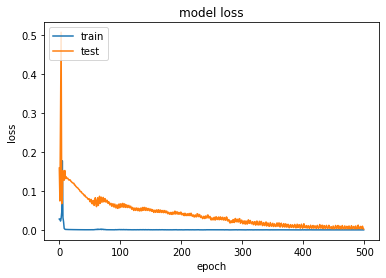

In [113]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Prediction

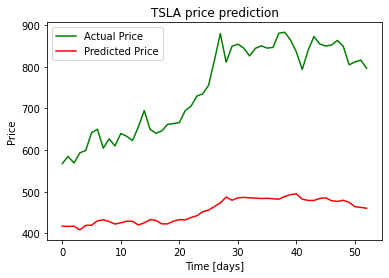

In [114]:
y_hat = model.predict(X_test)

y_test_inverse = close_transformer.inverse_transform(y_test.reshape(-1,1))
y_hat_inverse = close_transformer.inverse_transform(y_hat.reshape(-1,1))
 
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title(ticker_name+' price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();